# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [3]:
raw_penguiens_df = palmerpenguins.load_penguins_raw()
raw_penguiens_df

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

#### Datos previamente procesados

In [4]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

### Utilizando los conjuntos de datos de `seaborn`

In [5]:
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [6]:
preprocess_penguins_df = pd.read_csv('penguins.csv')
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [8]:
(preprocess_penguins_df
.dtypes
.value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
preprocess_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [11]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

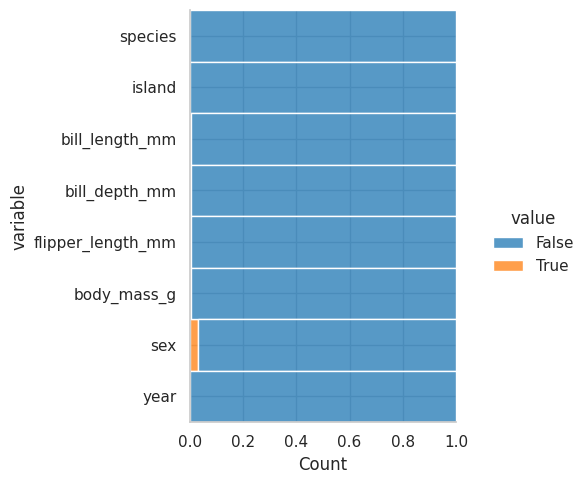

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .melt() 
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y= 'variable',
                hue= 'value',
                multiple= 'fill'
            )
        )
    ) 
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

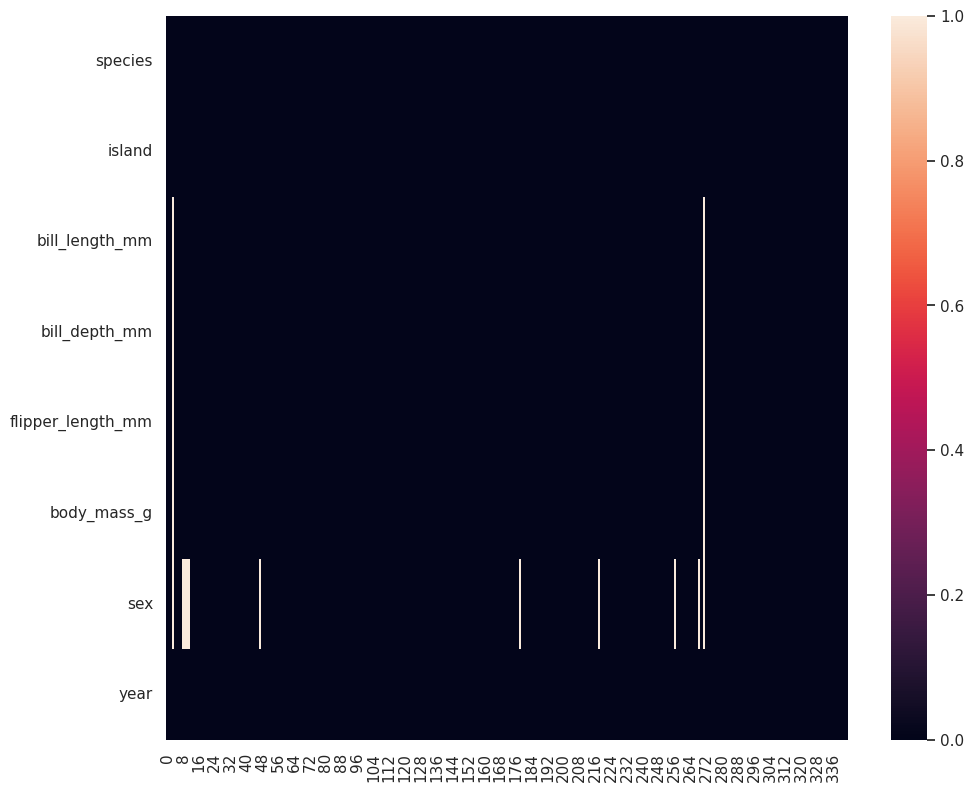

In [14]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [15]:
process_penguins_df = (
    preprocess_penguins_df
    .dropna()
)
process_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [16]:
process_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

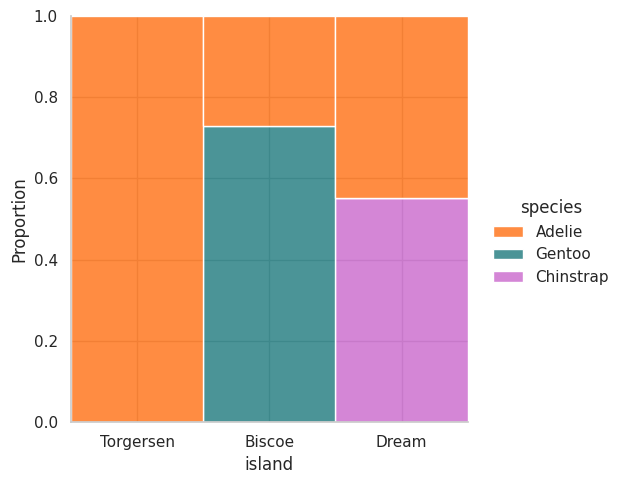

In [17]:
(
    process_penguins_df
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='island',
                hue='species',
                multiple='fill',
                palette=penguin_color,
                stat='proportion'
            )
        )
    )
)

### Solo las numéricas

In [18]:
process_penguins_df.describe(include=[np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

### Solo categóricas - 1

In [19]:
process_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Solo categóricas - 2

In [20]:
(
    process_penguins_df
    .astype({
        'species':'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

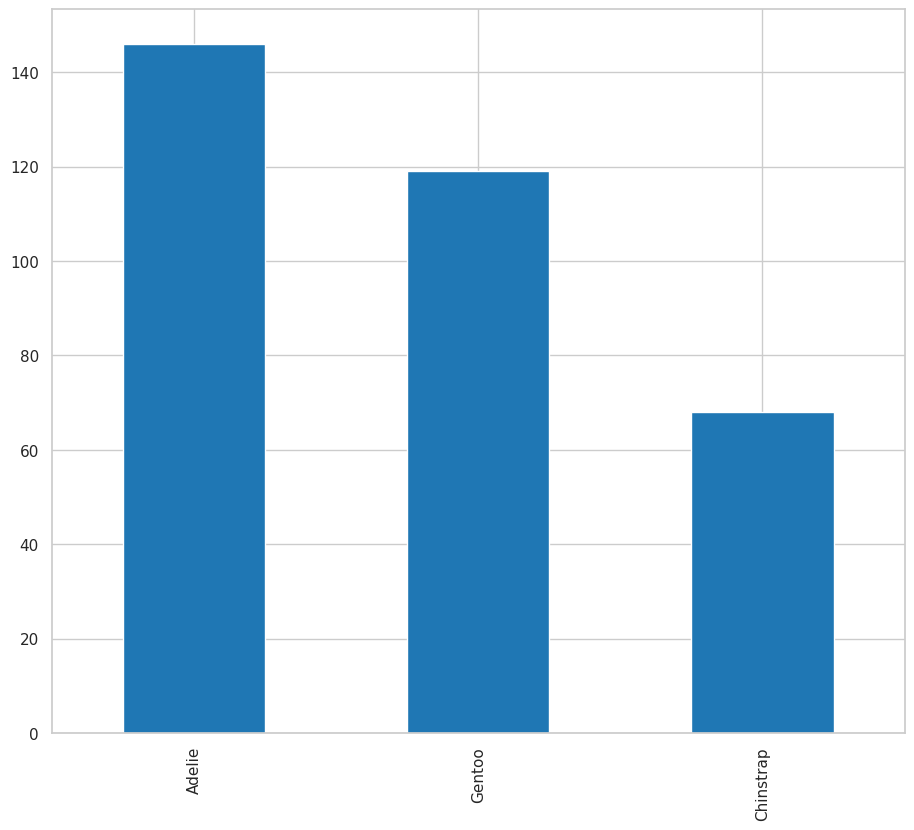

In [21]:
(
    process_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

### Seaborn

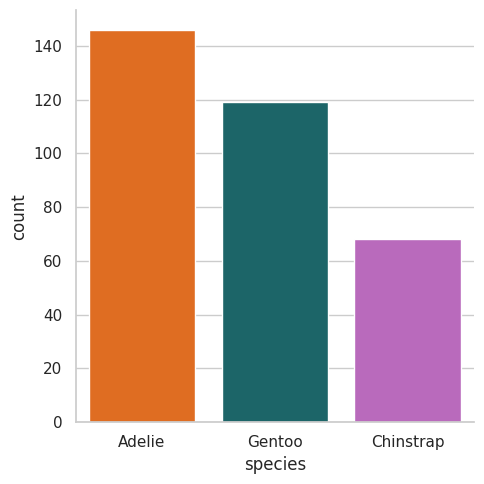

In [22]:
sns.catplot(
    data=process_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='count'>

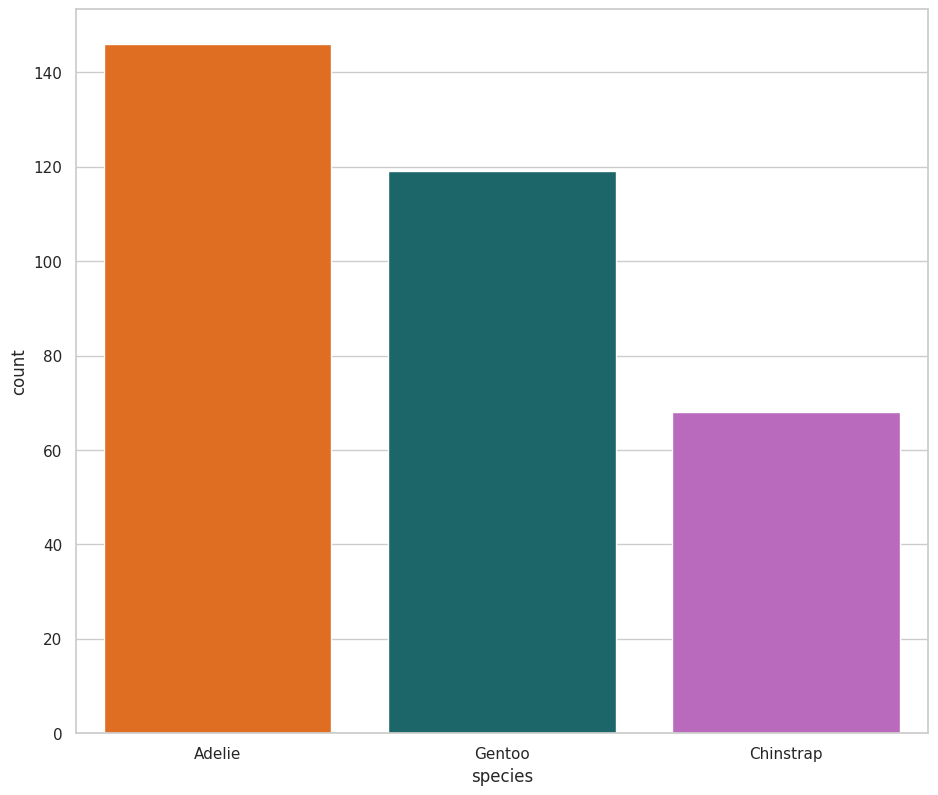

In [23]:
(
    process_penguins_df
    .value_counts('species',sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:(
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

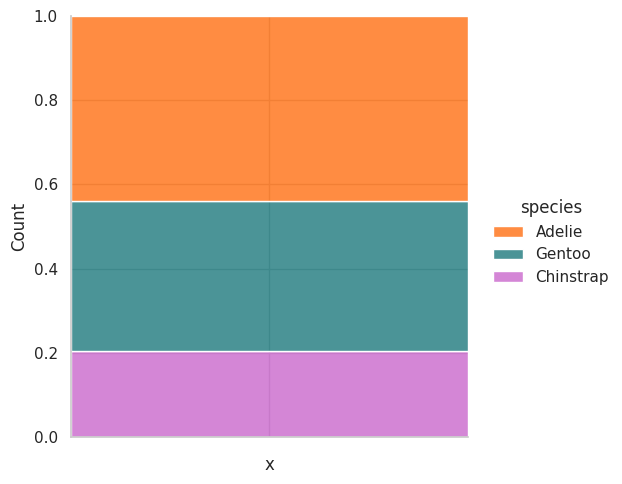

In [24]:
(
    process_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)

# Medidas de tendencia central

## Media o promedio

In [25]:
process_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [26]:
np.mean(process_penguins_df.bill_depth_mm)

17.164864864864867

In [27]:
process_penguins_df.mean()

/tmp/ipykernel_106/941056637.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [28]:
process_penguins_df.median()

/tmp/ipykernel_106/917396756.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [29]:
process_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [30]:
process_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [31]:
process_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [32]:
process_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [33]:
process_penguins_df.max(numeric_only=True) - process_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [34]:
process_penguins_df.mean() - process_penguins_df.std()

/tmp/ipykernel_106/2759102573.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins_df.mean() - process_penguins_df.std()
/tmp/ipykernel_106/2759102573.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins_df.mean() - process_penguins_df.std()


bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

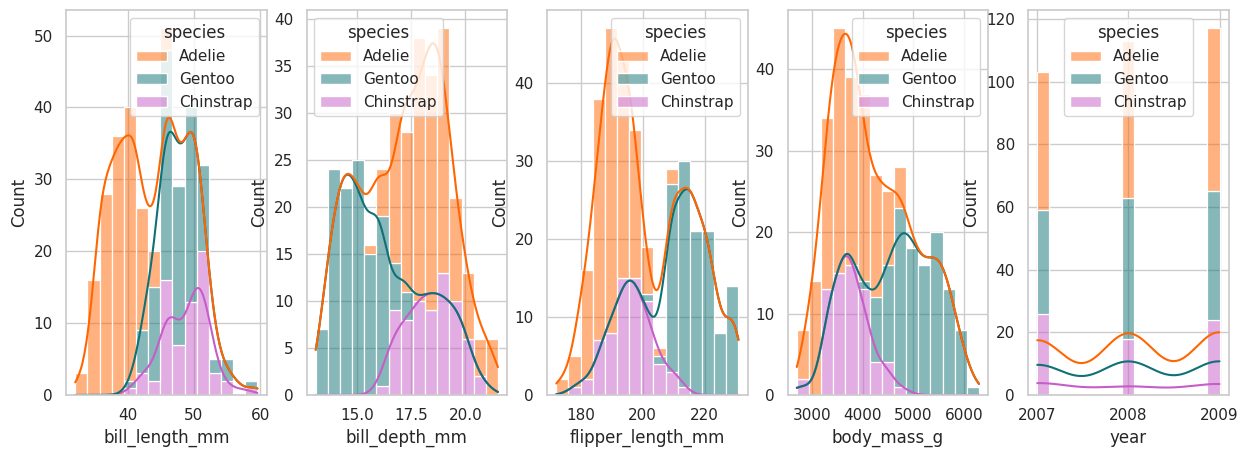

In [35]:
''' Esta línea obtiene las columnas numéricas del DataFrame process_penguins_df utilizando el método select_dtypes y el parámetro 
include=np.number. Luego, asigna esas columnas a la variable numeric_columns.'''
numeric_columns = process_penguins_df.select_dtypes(include=np.number).columns


'''Esta línea crea una figura y un conjunto de ejes para trazar los histogramas. Se crea una sola fila de subtramas con una cantidad 
de subtramas igual a la longitud de numeric_columns. Se establece el tamaño de la figura en 15 unidades de ancho y 5 unidades de alto'''
fig,ax = plt.subplots(1,len(numeric_columns), figsize=(15,5))



'''Este bucle for itera sobre los índices de las columnas numéricas. Para cada índice i, 
se traza un histograma utilizando la función histplot de Seaborn. Los argumentos utilizados son los siguientes:

ax=ax[i]: Asigna el eje i como el eje actual para el histograma.
data=process_penguins_df: Utiliza el DataFrame process_penguins_df como origen de los datos.
x=numeric_columns[i]: Utiliza la columna numérica correspondiente al índice i como variable para el eje x del histograma.
multiple='stack': Permite apilar los histogramas si hay múltiples categorías en la variable categórica hue.
hue='species': Utiliza la columna 'species' como variable categórica para distinguir las diferentes especies en el histograma.
bins=15: Especifica el número de contenedores (bins) en el histograma.
palette=penguin_color: Utiliza la paleta de colores penguin_color para colorear las barras del histograma.
kde=True: Traza una estimación de la densidad del kernel junto con el histograma.
'''
for i in range(len(numeric_columns)):
    sns.histplot( 
        ax=ax[i],
        data=process_penguins_df,
        x=numeric_columns[i],
        multiple='stack',
        hue='species',
        bins=15,
        palette=penguin_color,
        kde=True,
        )

In [36]:
'''Esta línea crea una variable llamada species y asigna a ella un arreglo con las especies únicas presentes
 en la columna "species" del dataframe process_penguins_df.'''
species = process_penguins_df.species.unique()

'''Estas tres líneas crean tres variables: adelie_df, gentoo_df y chinstrap_df. 
Cada variable contiene un subconjunto del dataframe process_penguins_df, filtrado por la especie
correspondiente.'''
adelie_df = process_penguins_df.query("species == 'Adelie'")
gentoo_df = process_penguins_df.query("species == 'Gentoo'")
chinstrap_df = process_penguins_df.query("species == 'Chinstrap'")


'''Esta línea crea una lista llamada list que contiene las tres variables
creadas anteriormente: adelie_df, gentoo_df y chinstrap_df.'''
list = [adelie_df,gentoo_df,chinstrap_df]

'''Esta línea crea una figura y subplots utilizando la biblioteca matplotlib. Se crea una sola fila de 
subplots con una cantidad de columnas igual a la longitud de la lista list. 
La figura tiene un tamaño de 15 unidades de ancho por 5 unidades de alto, y 
los subplots comparten el eje y.'''
fig,ax = plt.subplots(1,len(list), figsize=(15,5), sharey=True)

'''Este bucle itera sobre los índices de la lista list. Para cada índice i, se traza un histograma 
utilizando seaborn (sns.histplot()) en el subplot correspondiente ax[i]. El histograma muestra la 
distribución de los valores de "flipper_length_mm" para la especie correspondiente. Los argumentos 
multiple='layer' y hue='species' permiten que los histogramas se superpongan y se coloreen según la 
especie.''''
for i in range(len(list)):
    sns.histplot( 
        ax=ax[i],
        data=list[i],
        x='flipper_length_mm',
        multiple='layer',
        hue='species',
        bins=15,
        kde=True,
        palette=penguin_color,
        )
'''Esta línea traza una línea vertical (axvline()) en el subplot ax[i] en la posición correspondiente
 a la media de los valores de "flipper_length_mm" para la especie actual. La línea se dibuja en color rojo.'''
    ax[i].axvline(
        x=list[i]['flipper_length_mm'].mean(),
        color='red'
        )
'''Esta línea traza otra línea vertical en el subplot ax[i] en la posición correspondiente al percentil
 25 (cuartil inferior) de los valores de "flipper_length_mm" para la especie actual. La línea se dibuja
  en color azul.'''
    ax[i].axvline(
        x=list[i]['flipper_length_mm'].quantile(.25),
        color='blue'
        )
'''Esta línea traza una tercera línea vertical en el subplot ax[i] en la posición correspondiente al 
percentil 75 (cuartil superior) de los valores de "flipper_length_mm" para la especie actual. La línea 
se dibuja en color azul.'''
    ax[i].axvline(
        x=list[i]['flipper_length_mm'].quantile(.75),
        color='blue'
        )

SyntaxError: EOL while scanning string literal (911285522.py, line 27)

In [0]:
numeric_columns = preprocess_penguins_df.select_dtypes(include=np.number).columns

fig, ax = plt.subplots(1, len(numeric_columns), figsize=(24,5))

for i, col in enumerate(numeric_columns):
    sns.histplot(
        data=preprocess_penguins_df,
        ax=ax[i],
        x=col,
        hue="species",
        binwidth=1,
        bins="auto",
        kde=True,
        alpha=.5,
        element="step",
        common_norm=False,
        stat="density",
    )
    
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel("Density")

plt.tight_layout()


## ¿Cuál es el rango intercuartílico?

In [ ]:
process_penguins_df.quantile(0.50)

In [ ]:
process_penguins_df.quantile(0.75) - process_penguins_df.quantile(0.25)

In [ ]:
(
    process_penguins_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df :df[0.75] - df[0.25]
    )
)

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

In [ ]:
sns.histplot(
    data=process_penguins_df,
    x='body_mass_g'
)
plt.axvline(
    x=process_penguins_df.body_mass_g.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=process_penguins_df.body_mass_g.median(),
    color='black',
    linestyle='dashed',
    linewidth=2
)

### Diagrama de caja / boxplot

In [ ]:
sns.boxplot(
    data=process_penguins_df,
    x='body_mass_g'
)

### Limitaciones

In [ ]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [ ]:
sns.histplot(
    data=process_penguins_df,
    x='body_mass_g',
    binwidth=30
)

plt.axvline(
    x=process_penguins_df['body_mass_g'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.show()

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

In [ ]:
sns.histplot(
    data=preprocess_penguins_df,
    x='body_mass_g',
    binwidth=50,
    stat='probability'
)

### Utilizando `empiricaldist`

In [ ]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    process_penguins_df.flipper_length_mm,    
    normalize=True
)

In [ ]:
pmf_flipper_length_mm.bar()

In [ ]:
pmf_flipper_length_mm(180)

In [ ]:
process_penguins_df.flipper_length_mm.max()

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

In [ ]:
sns.ecdfplot(
    data=process_penguins_df,
    x='body_mass_g'
)

### Utilizando `empiricaldist`

In [ ]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    process_penguins_df.flipper_length_mm,
    normalize=True
)

In [ ]:
cdf_flipper_length_mm.plot()
q = 200
p = cdf_flipper_length_mm(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

In [ ]:
cdf_flipper_length_mm.step ( )
p_1 = 0.25 # Specify probability
P_2 = 0.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

In [ ]:
pmf_flipper_length_mm.describe()

### Comparando distribuciones

In [ ]:
sns.ecdfplot(
    data=process_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

In [ ]:
sns.kdeplot(
    data=process_penguins_df,
    x='body_mass_g',
    hue='species',
    bw_method=0.1
    
)

In [ ]:
stats = process_penguins_df.body_mass_g.describe()
stats

In [ ]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
ys
plt.plot(xs, ys ,color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    process_penguins_df.body_mass_g,
    normalize=True
).plot()

In [ ]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
ys
plt.plot(xs, ys ,color='black', linestyle='dashed')

sns.kdeplot(
    data=process_penguins_df,
    x='body_mass_g'
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

In [ ]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

In [ ]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.yl=([0, 0.50])
    plt.title(f'Sample size: {sample_size}')

## Teorema del Límite Central

In [ ]:
process_penguins_df.sex.value_counts(normalize=True)


In [ ]:
sex_numeric = process_penguins_df.sex.replace(['male','female' ], [1, 0])
sex_numeric

In [ ]:
number_sample = 1000 #cantidad de muestras a tomar
sample_size = 35 #tamaño de la muestra

sample_df = pd.DataFrame() #dataframe donde se almacena las media de cada muestra

np.random.seed(42)

for i in range(1, number_sample + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f'sample {i}'
    sample_df[sample_name] = sex_numeric_sample

male_population_mean = sample_df.mean().mean()
print(f'El porcentaje de pinguinos machos en la poblacion es de: {male_population_mean*100:.4f}%')

In [ ]:
sample_means_binomial = pd.DataFrame(sample_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')


In [ ]:
sample_size_experiment = pd.DataFrame(
    [[i, sample_df.iloc[:, 0:i].mean().mean().mean()]for i in range(1, number_sample + 1)],
    columns=['sample_size', 'estimated_mean']
)

In [ ]:
#grafica  del efecto
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.2])

# Estableciendo relaciones: Gráfica de puntos

In [ ]:
sns.scatterplot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100
)

In [ ]:
sns.displot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

In [ ]:
sns.displot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
)

In [ ]:
sns.jointplot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm '
)

# Estableciendo relaciones: Gráficos de violín y boxplots

In [ ]:
sns.scatterplot(
    data=process_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color

)

In [ ]:
sns.stripplot(
    data=process_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

In [ ]:
ax = sns.boxplot(
    data=process_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=process_penguins_df,
    x='flipper_length_mm',
    y='species',
    color=' .3'
)

In [ ]:
ax = sns.violinplot(
    data=process_penguins_df,
    x='species',
    y='flipper_length_mm',
    color=' .8'
)
ax = sns.stripplot(
    data=process_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

In [ ]:
sns.swarmplot(
    data=process_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color

)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [ ]:
process_penguins_df.corr()

## ¿Cómo puedo visualizar los coeficientes de correlación?

In [ ]:
sns.heatmap(
    data=process_penguins_df.corr(),
    cmap=sns.diverging_palette(28, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

In [ ]:
sns.clustermap(
    data=process_penguins_df.corr(),
    cmap=sns.diverging_palette(28, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [39]:
process_penguins_df = (
    process_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['female', 'male'], [0,1])
    )
)

In [ ]:
sns.clustermap(
    data=process_penguins_df.corr(),
    cmap=sns.diverging_palette(28, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

In [ ]:
x = np.linspace(-100, 100, 100)
y= x**2
y += np.random.normal(0 , 1000, x.size)

sns.scatterplot(
    x=x, y=y
)
np.corrcoef(x,y)

In [ ]:
x = np.linspace(-100, 100, 100)
y= x**3.3
y += np.random.normal(0 , 1000, x.size)

sns.scatterplot(
    x=x, y=y
)
np.corrcoef(x,y)

In [ ]:
sns.scatterplot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
    
)

### El coeficiente de correlación no nos habla del impacto de la relación

In [ ]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

# Estableciendo relaciones: Análisis de regresión simple

In [ ]:
res_1 = scipy.stats.linregress(x=x1, y=y1)
res_2 = scipy.stats.linregress(x=x2, y=y2)

print(res_1, res_2, sep='\n')

In [ ]:
# Crear un gráfico de dispersión con los valores de x1 e y1
sns.scatterplot(x=x1, y=y1)

# Crear un array NumPy con los valores mínimos y máximos de x1
fx_1 = np.array([x1.min(), x1.max()])

# Calcular fy_1 usando la fórmula de regresión lineal con los resultados de res_1
fy_1 = res_1.intercept + res_1.slope * fx_1

# Trazar una línea con los puntos fx_1 y fy_1 en el gráfico existente
plt.plot(fx_1, fy_1)

# Crear un gráfico de dispersión con los valores de x2 e y2
sns.scatterplot(x=x2, y=y2)

# Crear un array NumPy con los valores mínimos y máximos de x2
fx_2 = np.array([x2.min(), x2.max()])

# Calcular fy_2 usando la fórmula de regresión lineal con los resultados de res_2
fy_2 = res_2.intercept + res_2.slope * fx_2

# Trazar una línea con los puntos fx_2 y fy_2 en el gráfico existente
plt.plot(fx_2, fy_2)

# Mostrar una leyenda en el gráfico con etiquetas "1", "2", "1", "2"
plt.legend(labels=["Scatter 1", "Regression 1", "Scatter 2", "Regression 2"])

In [ ]:
sns.scatterplot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(
    x=process_penguins_df.bill_length_mm,
    y=process_penguins_df.bill_depth_mm

)
print(res_penguins)

fx_1 = np.array([process_penguins_df.bill_length_mm.min(),process_penguins_df.bill_length_mm.max()])
fy_1 = res_penguins.intercept + res_penguins.slope * fx_1

plt.plot(fx_1, fy_1)

In [ ]:
sns.lmplot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [4]:
x = process_penguins_df.bill_length_mm

y = process_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

In [5]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

In [11]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

In [13]:
sns.scatterplot(
    x=x,
    y=y
)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [20]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data=process_penguins_df
    )
    .fit()
    .params
)

In [21]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=process_penguins_df
    )
    .fit()
    .params
)

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

In [16]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=process_penguins_df
    )
    .fit()
)

model_1.summary()

#### Modelo 2

In [1]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=process_penguins_df
    )
    .fit()
)

model_2.summary()

#### Modelo 3

In [2]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=process_penguins_df
    )
    .fit()
)

model_3.summary()

#### Modelo 4

In [37]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=process_penguins_df
    )
    .fit()
)

model_4.summary()

#### Modelo 5

In [2]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=process_penguins_df
    )
    .fit()
)

model_5.summary()

### Visualizando resultados

#### Creación de tabla de resultados

In [6]:
model_result = pd.DataFrame(
    dict(
        actual_value=process_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=process_penguins_df.species,
        sex=process_penguins_df.sex
    )
)

model_result

#### ECDFs

In [9]:
sns.ecdfplot(
    data=model_result.select_columns(['actual_value','prediction_model_5'])
)

#### PDFs

In [11]:
sns.kdeplot(
    data=model_result,
    cumulative=True
  )

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

In [12]:
sns.lmplot(
    data=process_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [44]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=process_penguins_df
).fit().summary()

## Exploración de nuestras variables categóricas

In [48]:
(
    process_penguins_df
    .value_counts(['island','sex'])
    .reset_index(name='count')
)

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [38]:
process_penguins_df.species.unique()

In [39]:
process_penguins_df = (
    process_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0]))
)

In [44]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=process_penguins_df
).fit()

model_is_adelie.params

In [48]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = process_penguins_df.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

In [50]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
)

In [51]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)




# Paradoja de Simpson

In [52]:
sns.scatterplot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

In [55]:
sns.lmplot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

In [58]:
sns.lmplot(
    data=process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10,
    palette=penguin_color
)

In [59]:
sns.pairplot(
    data=process_penguins_df,
    hue='species',
    palette=penguin_color
)

## Información de sesión

In [0]:
I'm Nico
I help businesses make data-driven decisions.
Skilled in AI and machine learning for Business Intelligence solutions using Python, SQL, and Tableau. Dedicated team player.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0bc6e15b-6826-4a7f-804c-de1f9ff5b7a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>